## Feature Varying Graph

Plots important values as a function of feature number.

#### Import packages and read in pre-processed dataframes/arrays

In [81]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featuredf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

In [ ]:
#delcol = featureDf.columns.str.startswith('pixelM')
#featureDf.drop(columns = delcol, inplace=True)
# featureDf.drop(list(featureDf.filter(regex = 'pixelM')), axis = 1, inplace = True)
# preProcFeats = featureDf.values.astype('float32')
# print np.argwhere(np.isfinite(preProcFeats) != True)

## New

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True)

estimator = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)


rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)
ranked1 = rfe.ranking_

481


In [ ]:
cvscores1 = rfe.grid_scores_
feats1 = range(1, len(cvscores1) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats1, cvscores1)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx1 = rfe.get_support(indices=True)
featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat1 = preProcFeats[:, featidx1]
print redfeat1.shape

#np.save('./redfeatnew', redfeat1)

# clf = sklearn.multiclass.OneVsRestClassifier(estimator,
#             n_jobs=1)

# print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat1, preProcLabels,\
#                                             cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Old

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

In [ ]:
cvscores2 = rfe.grid_scores_
feats2 = range(1, len(cvscores2) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats2, cvscores2)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx2 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat2 = preProcFeats[:, featidx2]
print redfeat2.shape

# np.save('./redfeatold', redfeat)

# clf = sklearn.multiclass.OneVsRestClassifier(estimator,
#             n_jobs=1)

# print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat2, preProcLabels,\
#                                             cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Binarised new

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

print preProcLabels

preProcLabels[preProcLabels != 9] = 0
preProcLabels[preProcLabels == 9] = 1

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

print preProcFeats.shape

In [ ]:
cvscores3 = rfe.grid_scores_
feats3 = range(1, len(cvscores3) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats3, cvscores3)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
#featidx3 = rfe.get_support(indices=True)
featureStrs = featuredf.columns.values
print featureStrs[featidx3]

In [ ]:
print preProcFeats.shape
redfeat3 = preProcFeats[:, featidx3]
print redfeat3.shape

# np.save('./redfeatbin', redfeat3)

# print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat3, preProcLabels,\
#                                             cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Binarised old

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

print preProcLabels

preProcLabels[preProcLabels != 9] = 0
preProcLabels[preProcLabels == 9] = 1

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

print preProcFeats.shape

In [ ]:
cvscores4 = rfe.grid_scores_
feats4 = range(1, len(cvscores4) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats4, cvscores4)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx4 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat4 = preProcFeats[:, featidx4]
print redfeat4.shape

#np.save('./redfeatold', redfeat)

# clf = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
#             class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
#             oob_score=False, random_state=420, verbose=0,
#             warm_start=False)

# print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat4, preProcLabels,\
#                                             cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Plot all of them together

ValueError: x and y must have same first dimension, but have shapes (481,) and (90,)

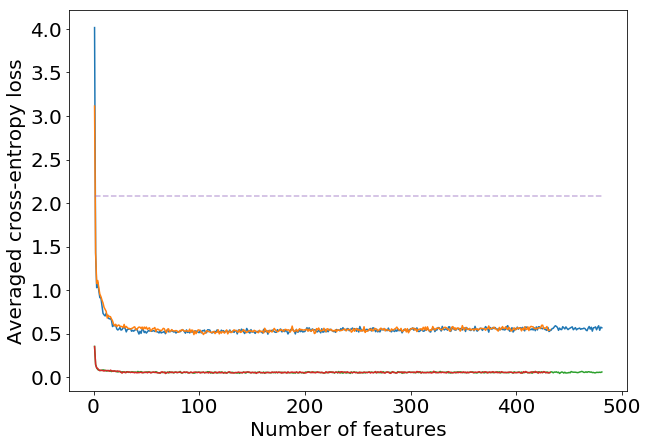

In [111]:
# If you randomly guessed the class, log loss would simply be Nlog(1/m) with N test samples and m number of 
# classes, which is why the binariser performs so well on the log_loss score!

luckyeighth = np.zeros(cvscores1.shape) + np.log(8)
luckyhalf = np.zeros(cvscores1.shape) + np.log(2)

plt.figure(figsize=(10,7))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.xlabel('Number of features')
plt.ylabel('Averaged cross-entropy loss')
plt.plot(range(1, len(cvscores1) + 1), -cvscores1, label = 'new features')
plt.plot(range(1, len(cvscores2) + 1), -cvscores2,  label = 'old features')
plt.plot(range(1, len(cvscores3) + 1), -cvscores3,  label = 'binarised new features')
plt.plot(range(1, len(cvscores4) + 1), -cvscores4,  label = 'binarised old features')
plt.plot(range(1, len(cvscores1) + 1), luckyeighth,'--', alpha = 0.5, label = 'guess for 8 classes')
plt.plot(range(1, len(cvscores1) + 1), luckyhalf, '--', alpha = 0.5, label = 'guess for 2 classes')
plt.ylim(0,2.3)
plt.title('Cross-entropy loss as a function of feature number')
plt.legend(bbox_to_anchor = (0.3,0.4))
plt.tight_layout()
plt.savefig('graphs/cv.png')
plt.show()

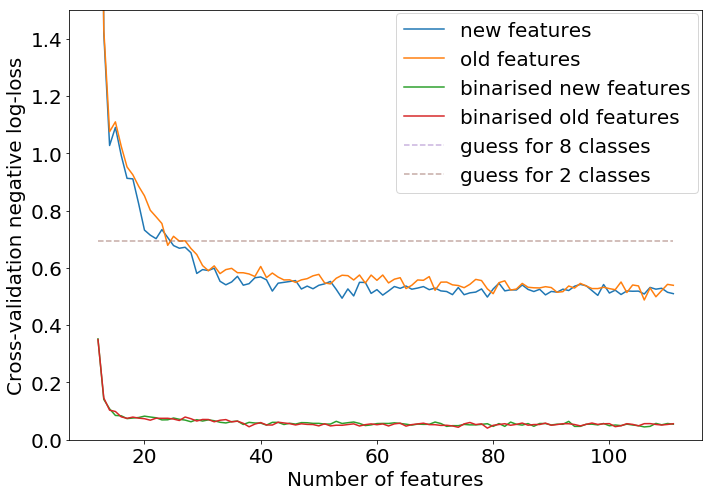

In [119]:
start = 0
end = 100


slicecvscore1 = cvscores1[start:end]
slicecvscore2 = cvscores2[start:end]
slicecvscore3 = cvscores3[start:end]
slicecvscore4 = cvscores4[start:end]
slicefeats1 = feats1[start:end]
slicefeats2 = feats2[start:end]
slicefeats3 = feats3[start:end]
slicefeats4 = feats3[start:end]

luckyeighth = np.zeros(slicecvscore1.shape) + np.log(8)
luckyhalf = np.zeros(slicecvscore1.shape) + np.log(2)

plt.figure(figsize=(10,7))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title--
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, -slicecvscore1, label = 'new features')
plt.plot(np.arange(1, len(slicecvscore2) + 1)+11, -slicecvscore2,  label = 'old features')
plt.plot(np.arange(1, len(slicecvscore3) + 1)+11, -slicecvscore3,  label = 'binarised new features')
plt.plot(np.arange(1, len(slicecvscore4) + 1)+11, -slicecvscore4,  label = 'binarised old features')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyeighth,'--', alpha = 0.5, label = 'guess for 8 classes')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyhalf, '--', alpha = 0.5, label = 'guess for 2 classes')
plt.ylim(0,1.5)
plt.tight_layout()
plt.legend(bbox_to_anchor = (0.5,0.55))
plt.savefig('graphs/cvslice.png')
plt.show()

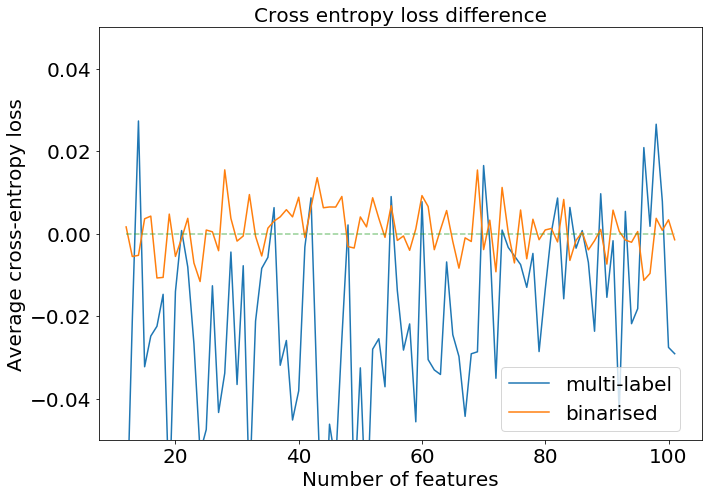

In [117]:
start = 10
end = 100

slicecvscore1 = cvscores1[start:end]
slicecvscore2 = cvscores2[start:end]
slicecvscore3 = cvscores3[start:end]
slicecvscore4 = cvscores4[start:end]
slicefeats1 = feats1[start:end]
slicefeats2 = feats2[start:end]
slicefeats3 = feats3[start:end]
slicefeats4 = feats4[start:end]

# luckyeighth = np.zeros(slicecvscore1.shape) + np.log(8)
luckyhalf = np.zeros(slicecvscore1.shape) + np.log(2)
zeros = np.zeros(slicecvscore1.shape)

plt.figure(figsize=(10,7))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title--
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.xlabel('Number of features')
plt.ylabel('Average cross-entropy loss')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+1+start, -slicecvscore1+slicecvscore2, label = 'multi-label')
plt.plot(np.arange(1, len(slicecvscore3) + 1)+1+start, -slicecvscore3+slicecvscore4,  label = 'binarised')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+1+start, zeros, '--', alpha = 0.5)
plt.ylim(-0.05,0.05)
plt.title('Cross entropy loss difference')
plt.tight_layout()
plt.legend(bbox_to_anchor = (0.65,0.2))
plt.savefig('graphs/cvslicediff.png')
plt.show()

In [121]:
print np.mean(slicecvscore1-slicecvscore2)

0.013476447373


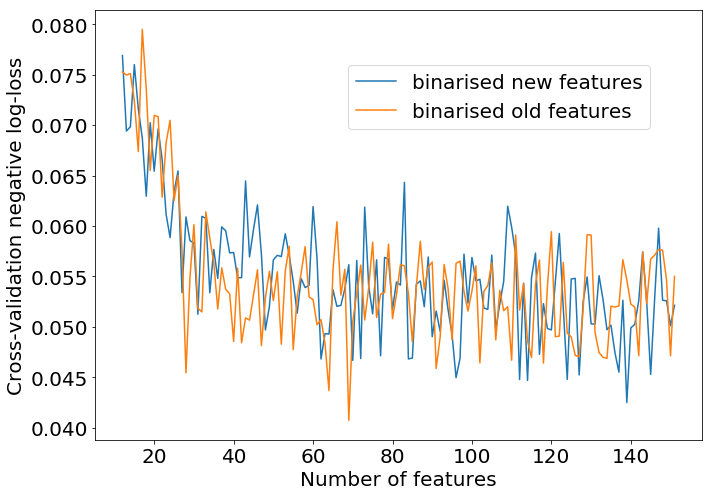

In [107]:
slicecvscore1 = cvscores1[10:150]
slicecvscore2 = cvscores2[10:150]
slicecvscore3 = cvscores3[10:150]
slicecvscore4 = cvscores4[10:150]
slicefeats1 = feats1[10:150]
slicefeats2 = feats2[10:150]
slicefeats3 = feats3[10:150]
slicefeats4 = feats3[10:150]

#luckyeighth = np.zeros(slicecvscore1.shape) + np.log(8)
#luckyhalf = np.zeros(slicecvscore1.shape) + np.log(2)

plt.figure(figsize=(10,7))
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title--
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
#plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, -slicecvscore1, label = 'new features')
#plt.plot(np.arange(1, len(slicecvscore2) + 1)+11, -slicecvscore2,  label = 'old features')
plt.plot(np.arange(1, len(slicecvscore3) + 1)+11, -slicecvscore3,  label = 'binarised new features')
plt.plot(np.arange(1, len(slicecvscore4) + 1)+11, -slicecvscore4,  label = 'binarised old features')
#plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyeighth,'--', alpha = 0.5, label = 'guess for 8 classes')
#plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyhalf, '--', alpha = 0.5, label = 'guess for 2 classes')
#plt.ylim(0,1)
plt.tight_layout()
plt.legend(bbox_to_anchor = (0.4,0.7))
plt.savefig('graphs/cvslicebin.png')
plt.show()